In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from openai import OpenAI
import speech_recognition as sr
from datetime import datetime
from os import path, listdir, getcwd
import wave
import sys
from vosk import Model, KaldiRecognizer, SetLogLevel
import json

In [2]:
r = sr.Recognizer()
times_by_ggl = {}
times_by_whisper = {}
times_by_vosk = {}
transcription_by_ggl = {}
transcription_by_whisper = {}
transcription_by_vosk = {}

# Get all audio files
folder_path = "/../audio_files/audio-stimuli/7/"
audio_files = listdir(getcwd() + folder_path)

# Initialize Vosk model
start = datetime.now()
model = Model(model_name="vosk-model-en-us-0.22")
end = datetime.now()
total_time_vosk_model = end - start
total_time_vosk_model = int(total_time_vosk_model.total_seconds() * 1e6)
print(f'Time taken to initialize the model {str(total_time_vosk_model)[0: len(str(total_time_vosk_model)) - 6]}.{str(total_time_vosk_model)[len(str(total_time_vosk_model)) - 6: ]}')

LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=13 max-active=7000 lattice-beam=6
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:11:12:13:14:15
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:279) Loading HCLG from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/graph/HCLG.fst
LOG (VoskAPI:ReadDataFiles():model.cc:294) Loading words from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/graph/words.txt
LOG (VoskAPI:ReadDataFiles():model.cc:303) Loading winfo /Users/kartikse/.cache/vosk/v

Time taken to initialize the model 8.109239


In [3]:
def time_taken_google_speech(audio):
    start = datetime.now()

    try:
        text = r.recognize_google(audio)
        # print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

    end = datetime.now()
    total_time = end - start
    return (total_time, text)

In [4]:
def time_taken_openAI_whisper(audio):
    start = datetime.now()

    try:
        text = r.recognize_whisper(audio)
        # print(r.recognize_whisper(audio))
    except sr.UnknownValueError:
        print("Did not understand")
    except sr.RequestError as e:
        print(e)
    
    end = datetime.now()
    total_time = end - start
    return (total_time, text)
    # return total_time

In [5]:
def time_taken_vosk(audio):
    start = datetime.now()
    rec = KaldiRecognizer(model, audio.getframerate())
    rec.SetWords(True)
    rec.SetPartialWords(True)

    while True:
        data = audio.readframes(4000)
        if len(data) == 0:
            break
        if rec.AcceptWaveform(data):
            rec.Result()
            # print(rec.Result())
        else:
            rec.PartialResult()
    
    end = datetime.now()
    total_time = end - start
    final_result = json.loads(rec.FinalResult())
    final_result = final_result['text']
    return (total_time, final_result)

In [6]:
for audio_file in audio_files:
    print(audio_file)
    # AUDIO_FILE = path.join(path.dirname(path.realpath(__file__)), audio_file)
    AUDIO_FILE = getcwd() + folder_path + audio_file

    # use the audio file as the audio source
    with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file
    print(f"Processing Audio file - {audio_file}")
    print()
    print("Time taken by Google Speech Recognition")
    tt_ggl, text_ggl = time_taken_google_speech(audio)
    tt_ggl = int(tt_ggl.total_seconds() * 1e6)
    print(tt_ggl)
    times_by_ggl[audio_file] = tt_ggl
    transcription_by_ggl[audio_file] = text_ggl

    print("Time taken by OpenAI Whisper")
    tt_whisper, text_whisper = time_taken_google_speech(audio)
    tt_whisper = int(tt_whisper.total_seconds() * 1e6)
    print(tt_whisper)
    times_by_whisper[audio_file] = tt_whisper
    transcription_by_whisper[audio_file] = text_whisper
    print()

    ## Seperate audio file reading for vosk

    audio = wave.open(AUDIO_FILE)
    if audio.getnchannels() != 1 or audio.getsampwidth() != 2 or audio.getcomptype() != "NONE":
        print("Audio file must be WAV format mono PCM.")
        sys.exit(1)

    print("Time taken by Vosk")
    tt_vosk, text_vosk = time_taken_vosk(audio)
    tt_vosk = int(tt_vosk.total_seconds() * 1e6)
    print(tt_vosk)
    times_by_vosk[audio_file] = tt_vosk
    transcription_by_vosk[audio_file] = text_vosk
    print()

7.1.wav
Processing Audio file - 7.1.wav

Time taken by Google Speech Recognition
565691
Time taken by OpenAI Whisper
575031

Time taken by Vosk
119140

7.3.wav
Processing Audio file - 7.3.wav

Time taken by Google Speech Recognition
483859
Time taken by OpenAI Whisper
563288

Time taken by Vosk
117537

7.2.wav
Processing Audio file - 7.2.wav

Time taken by Google Speech Recognition
719791
Time taken by OpenAI Whisper
713382

Time taken by Vosk
119794

7.6.wav
Processing Audio file - 7.6.wav

Time taken by Google Speech Recognition
668327
Time taken by OpenAI Whisper
582965

Time taken by Vosk
112027

7.7.wav
Processing Audio file - 7.7.wav

Time taken by Google Speech Recognition
679967
Time taken by OpenAI Whisper
687464

Time taken by Vosk
125857

7.5.wav
Processing Audio file - 7.5.wav

Time taken by Google Speech Recognition
522053
Time taken by OpenAI Whisper
506395

Time taken by Vosk
102220

7.4.wav
Processing Audio file - 7.4.wav

Time taken by Google Speech Recognition
654725


In [7]:
total_times_ggl = 0
total_times_whisper = 0
total_times_vosk = 0

print("Total times taken by Google Speech Recognition")
for k in times_by_ggl:
    print(k, times_by_ggl[k])
    t = times_by_ggl[k]
    total_times_ggl += t
print()

print("Total times taken by OpenAI Whisper")
for k in times_by_whisper:
    print(k, times_by_whisper[k])
    t = times_by_whisper[k]
    total_times_whisper += t
print()

print("Total times taken by Vosk")
for k in times_by_vosk:
    print(k, times_by_vosk[k])
    t = times_by_vosk[k]
    total_times_vosk += t
print()


print(f'Total time taken by Google Speech Recognition to process {len(audio_files)} audio files is {str(total_times_ggl)[0: len(str(total_times_ggl)) - 6]}.{str(total_times_ggl)[len(str(total_times_ggl)) - 6: ]} seconds')
print(f'Total time taken by OpenAI Whisper to process {len(audio_files)} audio files is {str(total_times_whisper)[0: len(str(total_times_whisper)) - 6]}.{str(total_times_whisper)[len(str(total_times_whisper)) - 6: ]} seconds')
print(f'Total time taken by Vosk to process {len(audio_files)} audio files is {str(total_times_vosk)[0: len(str(total_times_vosk)) - 6]}.{str(total_times_vosk)[len(str(total_times_vosk)) - 6: ]} seconds')

Total times taken by Google Speech Recognition
7.1.wav 565691
7.3.wav 483859
7.2.wav 719791
7.6.wav 668327
7.7.wav 679967
7.5.wav 522053
7.4.wav 654725
7.9.wav 765320
7.8.wav 637945
7.10.wav 588534

Total times taken by OpenAI Whisper
7.1.wav 575031
7.3.wav 563288
7.2.wav 713382
7.6.wav 582965
7.7.wav 687464
7.5.wav 506395
7.4.wav 642146
7.9.wav 769521
7.8.wav 689171
7.10.wav 810194

Total times taken by Vosk
7.1.wav 119140
7.3.wav 117537
7.2.wav 119794
7.6.wav 112027
7.7.wav 125857
7.5.wav 102220
7.4.wav 97616
7.9.wav 155127
7.8.wav 93980
7.10.wav 121656

Total time taken by Google Speech Recognition to process 10 audio files is 6.286212 seconds
Total time taken by OpenAI Whisper to process 10 audio files is 6.539557 seconds
Total time taken by Vosk to process 10 audio files is 1.164954 seconds


In [8]:
times_by_ggl_sorted = {k: v for (k, v) in sorted(times_by_ggl.items(), key = lambda x: x[0])}
transcription_by_ggl_sorted = {k: v for (k, v) in sorted(transcription_by_ggl.items(), key = lambda x: x[0])}

times_by_whisper_sorted = {k: v for (k, v) in sorted(times_by_whisper.items(), key = lambda x: x[0])}
transcription_by_whisper_sorted = {k: v for (k, v) in sorted(transcription_by_whisper.items(), key = lambda x: x[0])}

times_by_vosk_sorted = {k: v for (k, v) in sorted(times_by_vosk.items(), key = lambda x: x[0])}
transcription_by_vosk_sorted = {k: v for (k, v) in sorted(transcription_by_vosk.items(), key = lambda x: x[0])}

In [9]:
whisper_df = pd.DataFrame(list(zip(times_by_whisper_sorted.keys(), times_by_whisper_sorted.values(), transcription_by_whisper_sorted.values())))
whisper_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
whisper_df

,File Name,Time to Convert,Transcribed Text
0,7.1.wav,575031,what have you been up to
1,7.10.wav,810194,please help me go to the store
2,7.2.wav,713382,can you help me reach this please
3,7.3.wav,563288,I'll be with you in a second
4,7.4.wav,642146,can you help me get something
5,7.5.wav,506395,can you hold on a
6,7.6.wav,582965,don't talk to me like that
7,7.7.wav,687464,I'm just trying to find something
8,7.8.wav,689171,it makes no sense to me
9,7.9.wav,769521,record your instructions on an audio


In [10]:
ggl_df = pd.DataFrame(list(zip(times_by_ggl_sorted.keys(), times_by_ggl_sorted.values(), transcription_by_ggl_sorted.values())))
ggl_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
ggl_df

,File Name,Time to Convert,Transcribed Text
0,7.1.wav,565691,what have you been up to
1,7.10.wav,588534,please help me go to the store
2,7.2.wav,719791,can you help me reach this please
3,7.3.wav,483859,I'll be with you in a second
4,7.4.wav,654725,can you help me get something
5,7.5.wav,522053,can you hold on a
6,7.6.wav,668327,don't talk to me like that
7,7.7.wav,679967,I'm just trying to find something
8,7.8.wav,637945,it makes no sense to me
9,7.9.wav,765320,record your instructions on an audio


In [11]:
vosk_df = pd.DataFrame(list(zip(times_by_vosk_sorted.keys(), times_by_vosk_sorted.values(), transcription_by_vosk_sorted.values())))
vosk_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
vosk_df

,File Name,Time to Convert,Transcribed Text
0,7.1.wav,119140,what have you been up to
1,7.10.wav,121656,please help me go to the store
2,7.2.wav,119794,can you help me reach this please
3,7.3.wav,117537,i'll be with you in a second
4,7.4.wav,97616,can you help me get something
5,7.5.wav,102220,can you hold on a minute
6,7.6.wav,112027,don't talk to me like that
7,7.7.wav,125857,i'm just trying to find something
8,7.8.wav,93980,it makes no sense to me
9,7.9.wav,155127,record your instructions on an audiotape


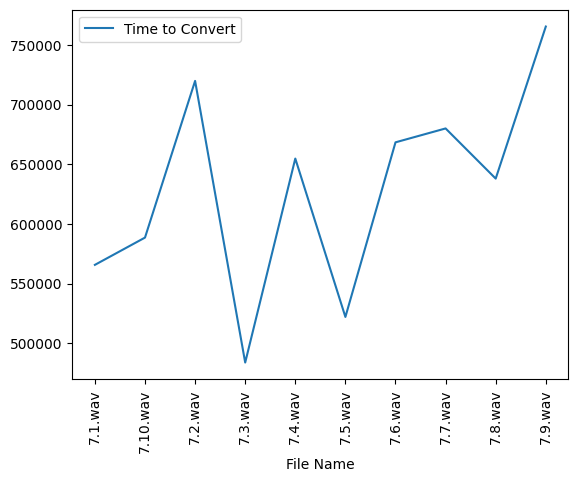

In [12]:
ggl_plot = ggl_df.plot.line(x='File Name', y='Time to Convert')
ggl_plot.set_xticks(np.arange(len(times_by_ggl_sorted)))
ggl_plot.set_xticklabels(ggl_df['File Name'])
ggl_plot.tick_params(axis='x', labelrotation=90)

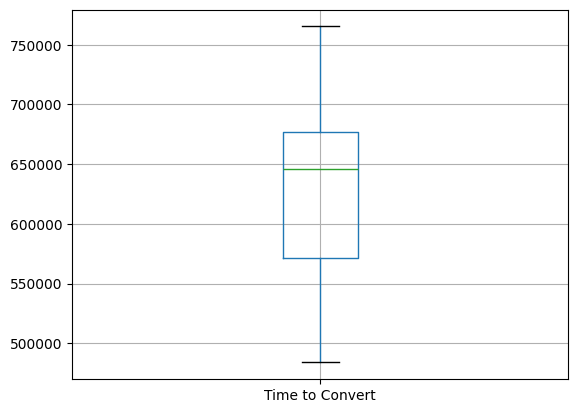

In [13]:
ggl_box_plot = ggl_df.boxplot(column='Time to Convert')

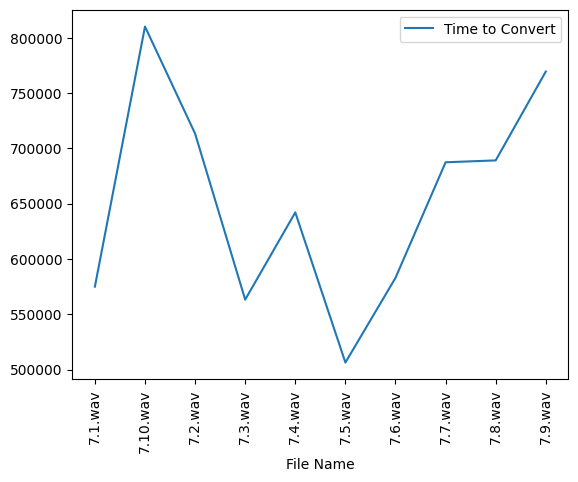

In [14]:
whisper_plot = whisper_df.plot.line(x='File Name', y='Time to Convert')
whisper_plot.set_xticks(np.arange(len(times_by_whisper_sorted)))
whisper_plot.set_xticklabels(whisper_df['File Name'])
whisper_plot.tick_params(axis='x', labelrotation=90)

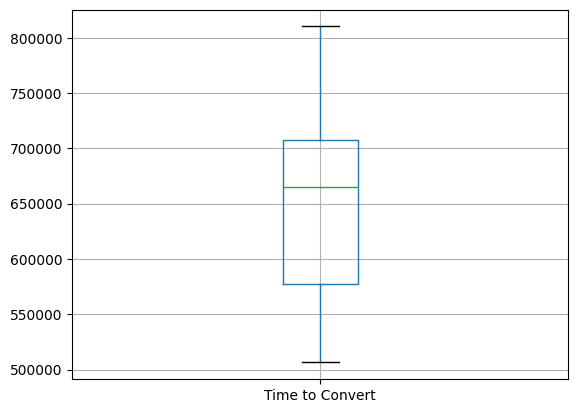

In [15]:
whisper_box_plot = whisper_df.boxplot(column='Time to Convert')

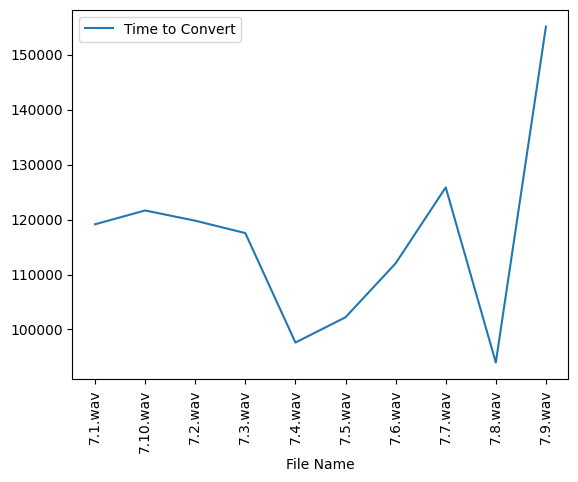

In [16]:
vosk_plot = vosk_df.plot.line(x='File Name', y='Time to Convert')
vosk_plot.set_xticks(np.arange(len(times_by_vosk_sorted)))
vosk_plot.set_xticklabels(vosk_df['File Name'])
vosk_plot.tick_params(axis='x', labelrotation=90)

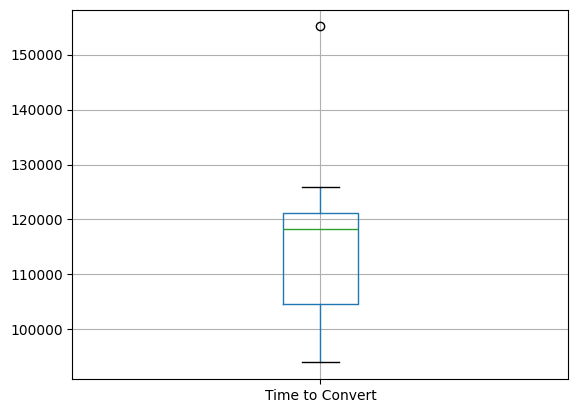

In [17]:
vosk_box_plot = vosk_df.boxplot(column='Time to Convert')